In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
# Import custom modules
import sys
sys.path.append('../src') # Add src directory to Python path
from data_loader import DataLoader
import seaborn as sb
import matplotlib.pyplot as plt


filepath = r"F:\Projetos_Pessoais\fase1\content\sample_data\diabetes.csv"
dataloader = DataLoader()

# Analise exploratoria - Transformando dados com valor 0 em nulos
# Apenas transformar colunas que fazem sentido para o negócio. No caso, Pregnancies e Outcome não foram transformadas.
# No outro arquivo iremos transformar nulos em valores "medianos"

In [ ]:
dataset = dataloader.load_dataset(filepath)

In [8]:
#Retorna informações iniciais do dataset para análise.
dataloader.get_info()


Informações sobre o Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Primeiras 5 linhas:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66       

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

# eixo X mostra os valores da dimensao e Y quantidade de vezes em proporção grafica

In [ ]:
dataset["Age"].hist()

In [ ]:
dataset.corr()

In [ ]:


matriz_correlacao = dataset.corr()

# 3. CONVERSÃO PARA VALOR ABSOLUTO (FORÇA DA CORRELAÇÃO: 0 a 1)
# Esta é a matriz que será usada para o mapa de calor
matriz_correlacao_0_a_1 = matriz_correlacao.abs()

# 4. Geração do Heatmap (Mapa de Calor)
plt.figure(figsize=(8, 6))

sb.heatmap(
    matriz_correlacao_0_a_1,  # A matriz com valores entre 0 e 1
    annot=True,               # Exibe os valores numéricos em cada célula
    fmt=".2f",                # Formata os números com 2 casas decimais
    cmap='viridis',           # Paleta de cores. 'viridis' é sequencial (ótima para 0 a 1)
    linewidths=.5,            # Adiciona linhas para separar as células
    cbar_kws={'label': 'Força da Correlação (0 = Fraca, 1 = Forte)'}, # Rótulo da barra de cores
    vmin=0,                   # Define o valor mínimo da escala de cores como 0
    vmax=1                    # Define o valor máximo da escala de cores como 1
)

plt.title('Mapa de Calor da Força da Correlação (Valores Absolutos)', fontsize=14)
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

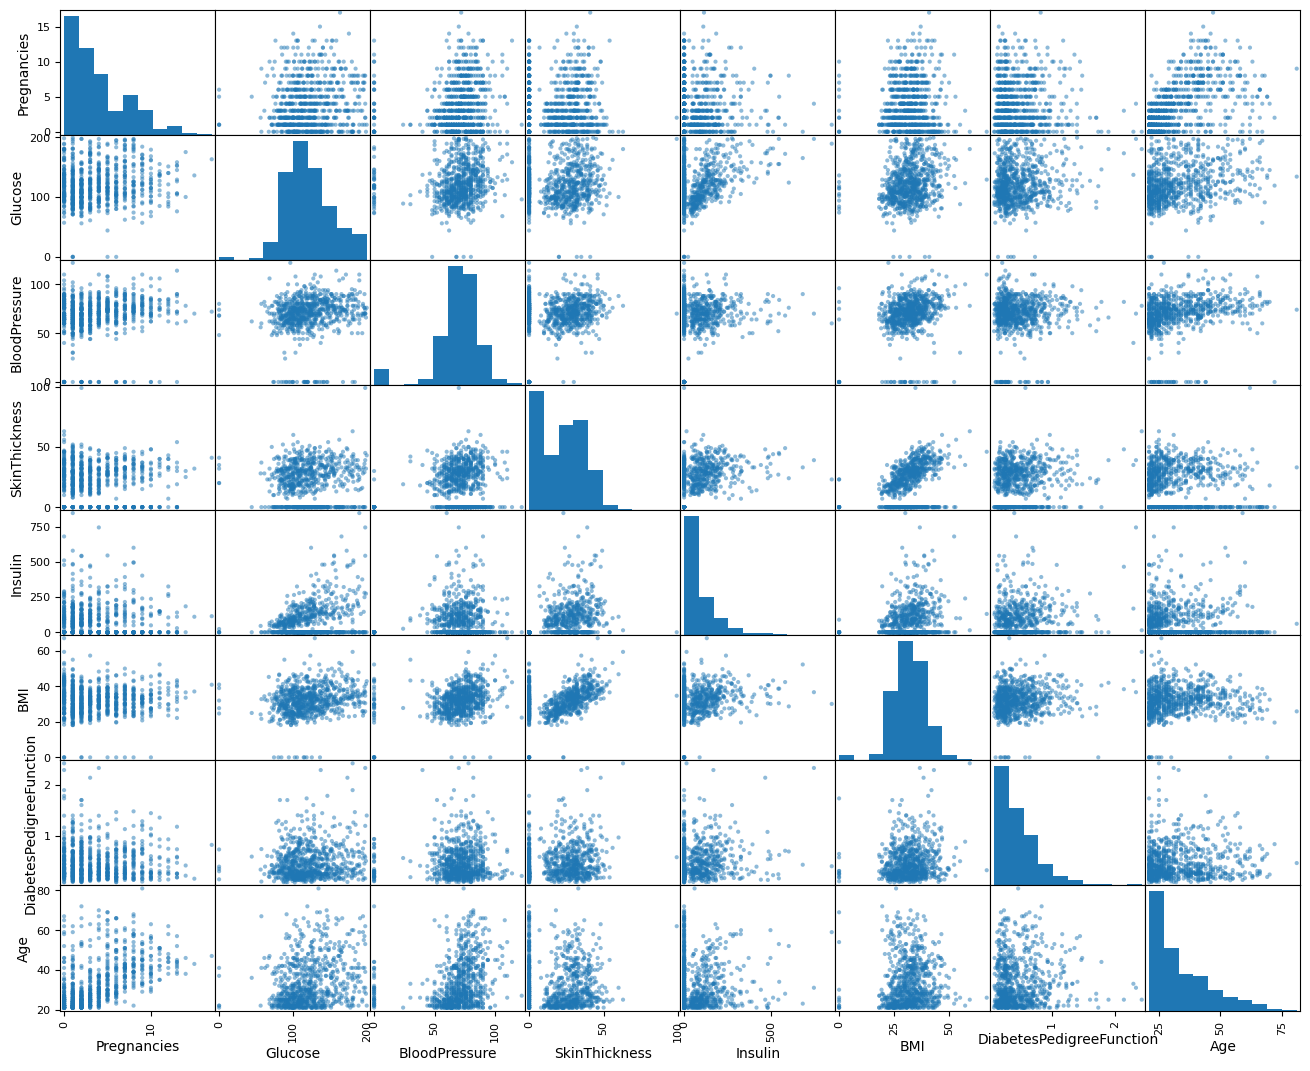

In [9]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

#Pregnancies 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI 	DiabetesPedigreeFunction 	Age 	Outcom

attributes = ["Pregnancies", "Glucose", "BloodPressure",
              "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

scatter_matrix(dataset[attributes], figsize=(16, 13))

#corr()
#attributes = ["median_house_value", "median_income", "total_rooms",
#              "housing_median_age"]
#scatter_matrix(copia[attributes], figsize=(12, 8))

In [10]:
import seaborn as sb

# Cria um boxplot para visualizar os outliers na coluna 'age'
# sb.boxplot(x=dataset['DiabetesPedigreeFunction'])
# plt.title('Outliers - DiabetesPedigreeFunction')
# plt.show()

# Defina a lista de colunas para iteração
colunas = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]

# Iterar sobre as colunas e gere os histogramas
for coluna in colunas:
    # Cria uma nova figura e eixo para cada gráfico
    plt.figure(figsize=(8, 5))

    # Gera o histograma usando seaborn
    sb.histplot(data=dataset, x=coluna, kde=True)

    # Adiciona título ao gráfico
    plt.title(f'Distribuição da Coluna: {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

    # Exibe o gráfico
    plt.show()


NameError: name 'plt' is not defined

In [ ]:
sb.histplot(data=dataset, x="DiabetesPedigreeFunction")


In [ ]:
# listando as colunas nulas

sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows

In [ ]:
zeros_por_coluna = (dataset == 0).sum()

print(zeros_por_coluna)

In [12]:
# 1. Obter a contagem de zeros
zeros_contagem = (dataset == 0).sum()

# 2. Filtrar apenas as colunas onde a contagem de zeros é > 0
colunas_com_zeros = zeros_contagem[zeros_contagem > 0]

print("Colunas com valores '0' para analisar:")

print(colunas_com_zeros)

Colunas com valores '0' para analisar:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [13]:

import numpy as np

# Segundo Gemini essas colunas são relevantes para análise de diabetes e então nós resolvemos aplicar a tecnica da mediana

# Suponha que df é seu DataFrame
colunas_para_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 1. Substituir os '0' por NaN (Not a Number) para tratar como dado ausente
dataset[colunas_para_imputar] = dataset[colunas_para_imputar].replace(0, np.nan)

In [14]:
# colunas que existem alguns valores nulos

dataset.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
# 1. Obter a contagem de zeros
zeros_contagem = (dataset == 0).sum()

# 2. Filtrar apenas as colunas onde a contagem de zeros é > 0
colunas_com_zeros = zeros_contagem[zeros_contagem > 0]

print("Colunas com valores '0' para analisar:")

print(colunas_com_zeros)

Colunas com valores '0' para analisar:
Pregnancies    111
Outcome        500
dtype: int64
